# Image Stitcher
___
**Fordyce Lab**, **2018**

## Imports

In [1]:
import sys
import pandas as pd

sys.path.insert(0, '/home/eMITOMI/Analysis_Pipelines/common/GithubRepos/ImageStitcher/')
from imagestitcher import stitcher

## FF Corrections

In [2]:
ffParamsPath = '/home/eMITOMI/Support_Data/FF_Correction/FFCorrectionVals.csv'
ffParams = pd.read_csv(ffParamsPath)
ffParams

,FFDate,Setup,TargetExposure(ms),FFDarkVal,FFScale,FFImageExposure(ms),FFImageName,FFImagePath,Channel
0,180324,2,500,-150,16665,2000,180324_Setup2_FF_eGFP_2000ms_2x2.tif,/home/eMITOMI/Support_Data/FF_Correction/Setup...,GFP
1,180324,2,2000,805,15577,2000,180324_Setup2_FF_eGFP_2000ms_2x2.tif,/home/eMITOMI/Support_Data/FF_Correction/Setup...,GFP
2,180401,3,500,201,21663,4000,180401_Setup3_FFcorr_eGFP_4s_2x2.tif,/home/eMITOMI/Support_Data/FF_Correction/Setup...,GFP
3,180401,3,2000,2778,19086,4000,180401_Setup3_FFcorr_eGFP_4s_2x2.tif,/home/eMITOMI/Support_Data/FF_Correction/Setup...,GFP
4,180324,4,500,226,12950,2000,180324_Setup4_FF_eGFP_2000ms_2x2.tif,/home/eMITOMI/Support_Data/FF_Correction/Setup...,GFP
5,180324,4,2000,0,13176,2000,180324_Setup4_FF_eGFP_2000ms_2x2.tif,/home/eMITOMI/Support_Data/FF_Correction/Setup...,GFP


## Stitching Settings

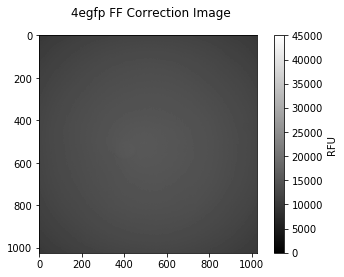

In [3]:
# Setup 4
setup_4_ffPath = '/home/eMITOMI/Support_Data/FF_Correction/Setup4/180324_Setup4_FF_eGFP_2000ms_2x2.tif'
setup_4_ffParams = {'4egfp':{500: (226, 12950), 2000: (0, 13176)}}

# Setup 3
setup_3_ffPath = '/home/eMITOMI/Support_Data/FF_Correction/Setup3/180401_Setup3_FFcorr_eGFP_4s_2x2.tif'
setup_3_ffParams = {'4egfp':{500: (201, 21663), 2000: (2778, 19086)}}

# Setup 2
setup_2_ffPath = '/home/eMITOMI/Support_Data/FF_Correction/Setup2/180324_Setup2_FF_eGFP_2000ms_2x2.tif'
setup_2_ffParams = {'4egfp':{500: (-150, 16665), 2000: (805, 15577)}}

settings = stitcher.StitchingSettings(ffPaths = {'4egfp': setup_4_ffPath},
                                        ffParams = setup_4_ffParams,
                                        setupNum= 4,
                                        tileDim = 1024
                                     )

settings.showFFImages(vmin = 0, vmax = 45000)

## Single Image Stitching

In [4]:
GFPPath = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup4/180420/ButtonQuantification/20180420-201501-d3_egfp_pre-folding_t2/4egfp/20180420-201501_egfp_pre-folding_t2_4egfp'

p = stitcher.RasterParams(GFPPath, 'ipnb', 0.1, 500, '4egfp', 4, autoFF = True)
stitcher.stitchImage(GFPPath, p)

18-05-21 00:08:40 INFO     Stitching Folder (Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0)
18-05-21 00:08:42 INFO     Stitching Complete


## Kinetic Images Stitching

In [5]:
kineticPath = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup4/180420/Assays/d3_cMUP/Kinetics/20180421_013353_200uM_cMUP_Rep_1/3dapi'

p = stitcher.RasterParams(kineticPath, 'ipnb', 0.1, None, '3dapi', 4, autoFF = False)
stitcher.stitchKinetics(kineticPath, p)

18-05-21 00:08:45 INFO     Starting Kinetic Stitch
18-05-21 00:08:45 INFO     Stitch Saved: (Time: 525.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:47 INFO     Stitch Saved: (Time: 450.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:48 INFO     Stitch Saved: (Time: 375.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:49 INFO     Stitch Saved: (Time: 3825.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:51 INFO     Stitch Saved: (Time: 300.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:52 INFO     Stitch Saved: (Time: 225.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:53 INFO     Stitch Saved: (Time: 1725.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:55 INFO     Stitch Saved: (Time: 2625.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:56 INFO     Stitch Saved: (Time: 150.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:57 INFO     Stitch Saved: (Time: 0.0, Ch: 3dapi, Ex: 200)
18-05-21 00:08:59 INFO     Stitch Saved: (Time: 1125.0, Ch: 3dapi, Ex: 200)
18-05-21 00:09:00 INFO     Stitch Saved: (Time: 825.0, Ch: 3dapi, Ex: 200)
18-05-21 00:09:01 INFO     Stitch Saved: (Time:

## Multi-Folder Stitching

In [5]:
multiImagePath = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup4/180420/Assays/d3_cMUP/Kinetics'

p = stitcher.RasterParams(multiImagePath, 'ipnb', 0.1, None, '3dapi', 4, autoFF = True)
stitcher.walkAndStitch(multiImagePath, p, stitchtype = 'kinetic')

18-05-20 21:34:47 INFO     Starting Kinetic Stitch
18-05-20 21:34:47 INFO     Stitch Saved: (Time: 225.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:48 INFO     Stitch Saved: (Time: 0.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:48 INFO     Stitch Saved: (Time: 1725.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:48 INFO     Stitch Saved: (Time: 150.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:49 INFO     Stitch Saved: (Time: 1125.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:49 INFO     Stitch Saved: (Time: 2625.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:49 INFO     Stitch Saved: (Time: 675.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:50 INFO     Stitch Saved: (Time: 600.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:50 INFO     Stitch Saved: (Time: 525.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:50 INFO     Stitch Saved: (Time: 450.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:51 INFO     Stitch Saved: (Time: 3825.0, Channel 3dapi, Ex: 200)
18-05-20 21:34:51 INFO     Stitch Saved: (Time: 375.0, Channel 3dapi, Ex: 200)

18-05-20 21:36:45 INFO     Stitch Saved: (Time: 300.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:46 INFO     Stitch Saved: (Time: 2625.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:48 INFO     Stitch Saved: (Time: 225.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:49 INFO     Stitch Saved: (Time: 1725.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:50 INFO     Stitch Saved: (Time: 150.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:52 INFO     Stitch Saved: (Time: 1125.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:53 INFO     Stitch Saved: (Time: 825.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:54 INFO     Stitch Saved: (Time: 675.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:55 INFO     Stitch Saved: (Time: 525.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:55 INFO     Stitching Complete
18-05-20 21:36:55 INFO     Starting Kinetic Stitch
18-05-20 21:36:57 INFO     Stitch Saved: (Time: 450.0, Channel 3dapi, Ex: 200)
18-05-20 21:36:58 INFO     Stitch Saved: (Time: 375.0, Channel 3dapi, Ex: 200)
18-05-20 21:37:00 INFO     Stit

18-05-20 21:38:54 INFO     Stitch Saved: (Time: 675.0, Channel 3dapi, Ex: 200)
18-05-20 21:38:55 INFO     Stitch Saved: (Time: 825.0, Channel 3dapi, Ex: 200)
18-05-20 21:38:55 INFO     Stitching Complete
18-05-20 21:38:55 INFO     Starting Kinetic Stitch
18-05-20 21:38:56 INFO     Stitch Saved: (Time: 3825.0, Channel 3dapi, Ex: 200)
18-05-20 21:38:58 INFO     Stitch Saved: (Time: 300.0, Channel 3dapi, Ex: 200)
18-05-20 21:38:59 INFO     Stitch Saved: (Time: 675.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:00 INFO     Stitch Saved: (Time: 525.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:02 INFO     Stitch Saved: (Time: 225.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:03 INFO     Stitch Saved: (Time: 150.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:05 INFO     Stitch Saved: (Time: 0.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:06 INFO     Stitch Saved: (Time: 2625.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:07 INFO     Stitch Saved: (Time: 600.0, Channel 3dapi, Ex: 200)
18-05-20 21:39:09 INFO     Stitch 